<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/149481_INCOME_TAX_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INCOME TAX FRAUD DETECTION: - A LOGISTIC REGRESSION APPROACH**


**BINARY CLASSIFICATION PROBLEM**

**Overview**

*   In many scenarios, tax payers are obliged to declare their incomes and pay a percentage of that amount to governmenty

*   This implies that many tax payers under-report earnings to reduce their taxes, as they have no incentive to report the actual amount.

*   The project uses Machine Learning algorithm to detect tax payers under-reporting their tax base in order to pay less taxes than they should

**Objectives**

*   Classify  similar tax declarations according to the values of their features.
*   Establish relationships between specific variables and income.
*   Detect suspicious declarations

In [56]:
# Loading the Income Dataset
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate  # Import tabulate for pretty printing (optional)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df_income = pd.read_excel('/content/drive/MyDrive/General/Income_Returns - B.xls')
pd.set_option('display.max_columns', None)
df_income.head()

,pin_no,station_name,obligation_name,filing_period,gross_tax_payable,Net_Tax - off Credits,filing_date,trp_from_dt,trp_to_dt,is_nil_return,is_amended,businessturnover,farmingturnover,rentalturnover,interestturnover,otherturnover,totalturnover,profitlossb4tax,profitlossaftertax,profitlossafterdiv,chargeableincome,Income,unsuedlossesbf,taxableincome,instalmenttax,withheldtax,advancetaxpaid,advancepayments,totalcredits,creditsec41
0,A003699794A,Thika,Income Tax - Resident,2021 - DEC,4590.0,4590.0,2022-04-01 11:01:10.255,2021-01-01,2021-12-31,N,N,0.0,0.0,1095400.0,0.0,0.0,1095400.0,306360.0,306360.0,0,306360.00,Medium,0.0,306360.00,0,0,0,0,0,0
1,A003233861Z,PREMIER TAX OFFICE,Income Tax - Resident,2021 - DEC,117009.0,26102.0,2022-04-27 10:30:38.063,2021-01-01,2021-12-31,N,N,578449423.0,0.0,1255058.0,0.0,0.0,579704481.0,694695.0,694695.0,0,694695.00,Small,0.0,694695.00,0,0,0,0,0,0
2,A004212524B,BUNGOMA,Income Tax - Resident,2021 - DEC,18900.0,0.0,2022-05-04 09:55:16.110,2021-01-01,2021-12-31,N,N,0.0,0.0,189000.0,0.0,0.0,189000.0,189000.0,189000.0,0,189000.00,Small,0.0,189000.00,0,0,0,0,0,0
3,A000110971B,South of Nairobi,Income Tax - Resident,2021 - DEC,0.0,0.0,2022-04-01 15:21:27.121,2021-01-01,2021-12-31,N,N,0.0,0.0,240000.0,0.0,0.0,240000.0,175000.0,175000.0,0,175000.00,Small,0.0,175000.00,0,0,0,0,0,0
4,A006535791K,KITUI,Income Tax - Resident,2021 - DEC,1785.0,1785.0,2022-04-27 10:15:05.649,2021-01-01,2021-12-31,N,N,0.0,0.0,765513.0,0.0,0.0,765513.0,295137.0,295137.0,0,295137.18,Small,0.0,295137.18,0,0,0,0,0,0


**Data Description**

In [59]:
from tabulate import tabulate

# Add columns and data to the table
table = [
["pin_no", "Tax Payer Unique Identifier"],
["station_name", "Name of the Station where the tax Payer registered"],
["obligation_name", "Taxes Applicable (Income Tax)"],
["filing_period", "A 12-month calendar year covered by a tax return"],
["gross_tax_payable", "It is an individual’s total earnings before taxes or other deductions are applied"],
["Net_Tax ", "Net income is the total amount of revenue less the total amount of expenses"],
["off Credits", " Any financial benefit or incentive that has been applied to reduce a taxpayer's overall tax liability"],
["filing_date", "Date Tax Payer Files his annual returns in itax"],
["businessturnover", "Refers to the total revenue or sales generated by the business within a year"],
["farmingturnover", "Refers to the total revenue or sales generated by farming activities within a year"],
["rentalturnover", "Refers to the total revenue or sales generated from renting out properties or assets within a year"],
["interestturnover", "Refers to the total revenue generated from interests earned within a year"],
["otherturnover", "Refers to the total revenue or sales generated from any other activity not mentioned"],
["totalturnover", "This is the sum of the total revenue or sales generated from all the turnovers."],
["profitlossb4tax", "Amount of profits earned before tax is applied"],
["profitlossaftertax", "Amount of profits earned after tax is applied"],
["profitlossafterdiv", "Cumulative net earnings or profits/losses of a company after accounting for dividend payments"],
["chargeableincome", "Refers to the income on which an individual or entity is liable to pay taxes"],
["Income", "Category of income earned by an individual"],
["unsuedlossesbf", "Amount of losses in the previous period brought forward"],
["taxableincome", "Refers to the portion of an individual's or entity's income that is subject to taxation by government"],
["instalmenttax", "A method of paying taxes in multiple installments or periodic payments throughout the year,"],
["withheldtax", "Portion of payments withheld and remitted to government towards offsetting the recipient's income tax liability."],
["advancetaxpaid", "Refers to a tax payment made in advance of the regular tax-filing deadline."],
["advancepayments", "Payments made in advance of receiving goods or services"],
["totalcredits", "Cumulative amount of credits"],
]
# Display the formatted table
print(tabulate(table, headers=["Column", "Description"], tablefmt="grid", colalign=("left", "left")))

+--------------------+------------------------------------------------------------------------------------------------------------------+
| Column             | Description                                                                                                      |
+====================+==================================================================================================================+
| pin_no             | Tax Payer Unique Identifier                                                                                      |
+--------------------+------------------------------------------------------------------------------------------------------------------+
| station_name       | Name of the Station where the tax Payer registered                                                               |
+--------------------+------------------------------------------------------------------------------------------------------------------+
| obligation_name    | Taxes Appli

In [60]:
#Data Dimesion
df_income.shape

(9187, 30)

<Axes: >

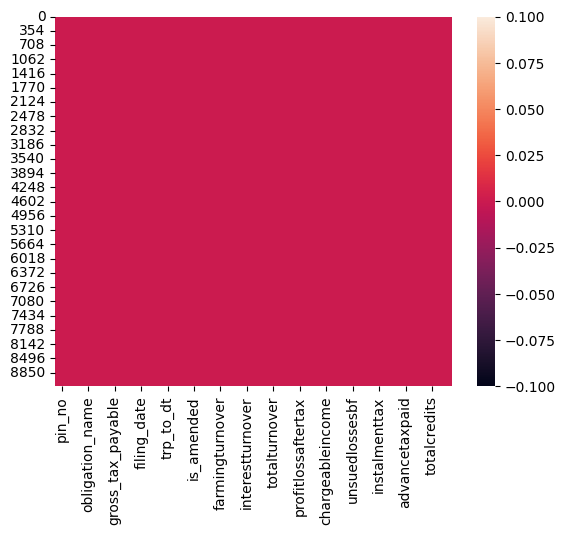

In [61]:
#Finding any null values
sns.heatmap(df_income.isnull())

In [62]:
df_income.dtypes

pin_no                           object
station_name                     object
obligation_name                  object
filing_period                    object
gross_tax_payable               float64
Net_Tax - off Credits           float64
filing_date              datetime64[ns]
trp_from_dt              datetime64[ns]
trp_to_dt                datetime64[ns]
is_nil_return                    object
is_amended                       object
businessturnover                float64
farmingturnover                 float64
rentalturnover                  float64
interestturnover                float64
otherturnover                   float64
totalturnover                   float64
profitlossb4tax                 float64
profitlossaftertax              float64
profitlossafterdiv                int64
chargeableincome                float64
Income                           object
unsuedlossesbf                  float64
taxableincome                   float64
instalmenttax                     int64


In [63]:
df_income.describe()

,gross_tax_payable,Net_Tax - off Credits,businessturnover,farmingturnover,rentalturnover,interestturnover,otherturnover,totalturnover,profitlossb4tax,profitlossaftertax,profitlossafterdiv,chargeableincome,unsuedlossesbf,taxableincome,instalmenttax,withheldtax,advancetaxpaid,advancepayments,totalcredits,creditsec41
count,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9187.0,9.187000e+03,9.187000e+03,9.187000e+03,9187.0,9187.0,9187.0,9187.0,9187.0,9187.0
mean,6.824931e+05,3.509207e+04,2.761393e+06,3.675068e+04,1.828790e+06,1.813251e+04,3.362600e+04,4.694963e+06,9.927222e+05,9.859180e+05,0.0,9.277229e+05,1.835298e+04,1.027380e+06,0.0,0.0,0.0,0.0,0.0,0.0
std,3.552239e+06,3.152268e+05,5.587329e+07,5.528364e+05,4.664630e+06,3.374391e+05,7.534582e+05,5.614228e+07,9.801876e+06,9.798076e+06,0.0,4.079625e+06,2.865707e+05,3.586001e+06,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.623630e+05,-2.945111e+06,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,-1.552304e+08,-1.552304e+08,0.0,-1.552304e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.913500e+03,-4.100000e+00,0.000000e+00,0.000000e+00,2.291420e+05,0.000000e+00,0.000000e+00,2.750000e+05,1.193135e+05,1.190225e+05,0.0,1.096240e+05,0.000000e+00,1.228540e+05,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.997500e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.520000e+05,0.000000e+00,0.000000e+00,7.386370e+05,2.987495e+05,2.986000e+05,0.0,2.982540e+05,0.000000e+00,3.013000e+05,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.645610e+05,1.528740e+04,0.000000e+00,0.000000e+00,1.521924e+06,0.000000e+00,0.000000e+00,2.381006e+06,6.237610e+05,6.213523e+05,0.0,6.021460e+05,0.000000e+00,6.150980e+05,0.0,0.0,0.0,0.0,0.0,0.0
max,2.377999e+08,1.681769e+07,4.548798e+09,2.117171e+07,1.027975e+08,1.687391e+07,6.200824e+07,4.551859e+09,8.783097e+08,8.783097e+08,0.0,1.135195e+08,1.057788e+07,1.135195e+08,0.0,0.0,0.0,0.0,0.0,0.0


**Observation**


The descriptives indicate that there is a wide range of values in the dataset, given the significant difference between the mean and the 25th percentile. The mean, being much larger (approximately 682,493.1), suggests that there might be outliers in the dataset that are influencing the average.

The 25th percentile (2,913.5) is relatively small compared to the mean, which suggests that a substantial portion of the dataset has lower values. This difference between the mean and the 25th percentile could be an indication of positive skewness in the distribution, meaning that there are some higher values pulling the mean upwards

**Exploratory Data Analysis**

In [64]:
correlation_matrix = df_income.corr()

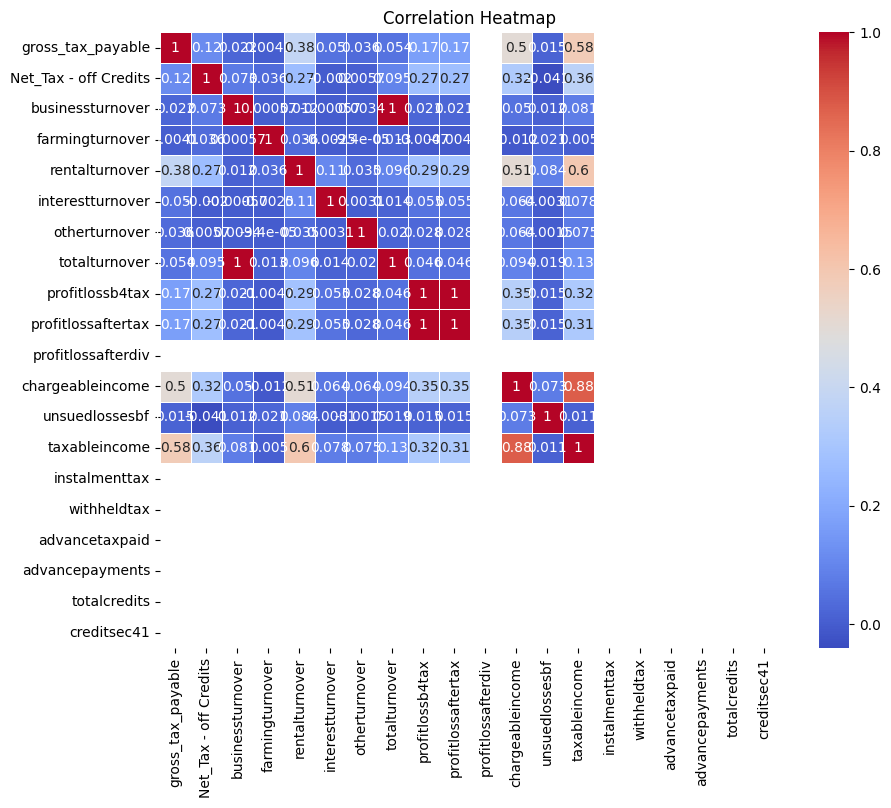

In [65]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

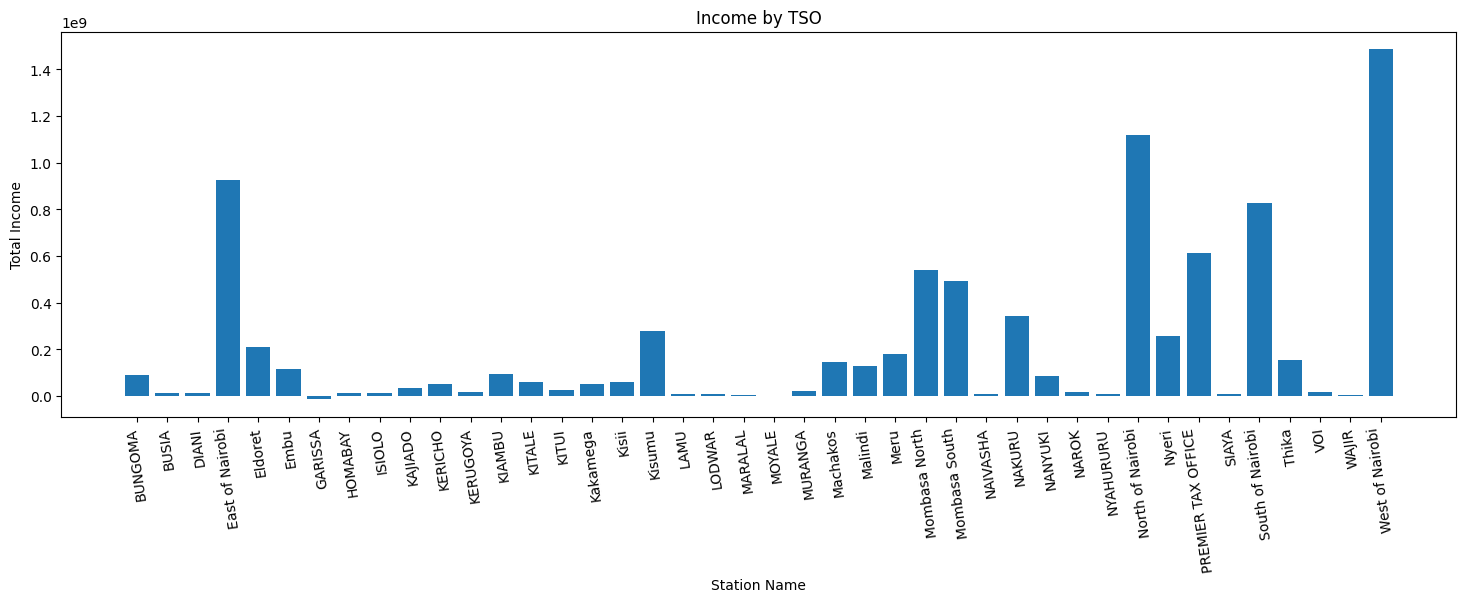

In [66]:
# Grouping by Station Name and calculating the sum of Chargebale Income
Income = df_income.groupby('station_name')['chargeableincome'].sum()

# Creating a bar chart
plt.figure(figsize=(18, 5))
plt.bar(Income.index, Income.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=98)

plt.xlabel('Station Name')
plt.ylabel('Total Income')
plt.title('Income by TSO')

# Show the plot
plt.show()

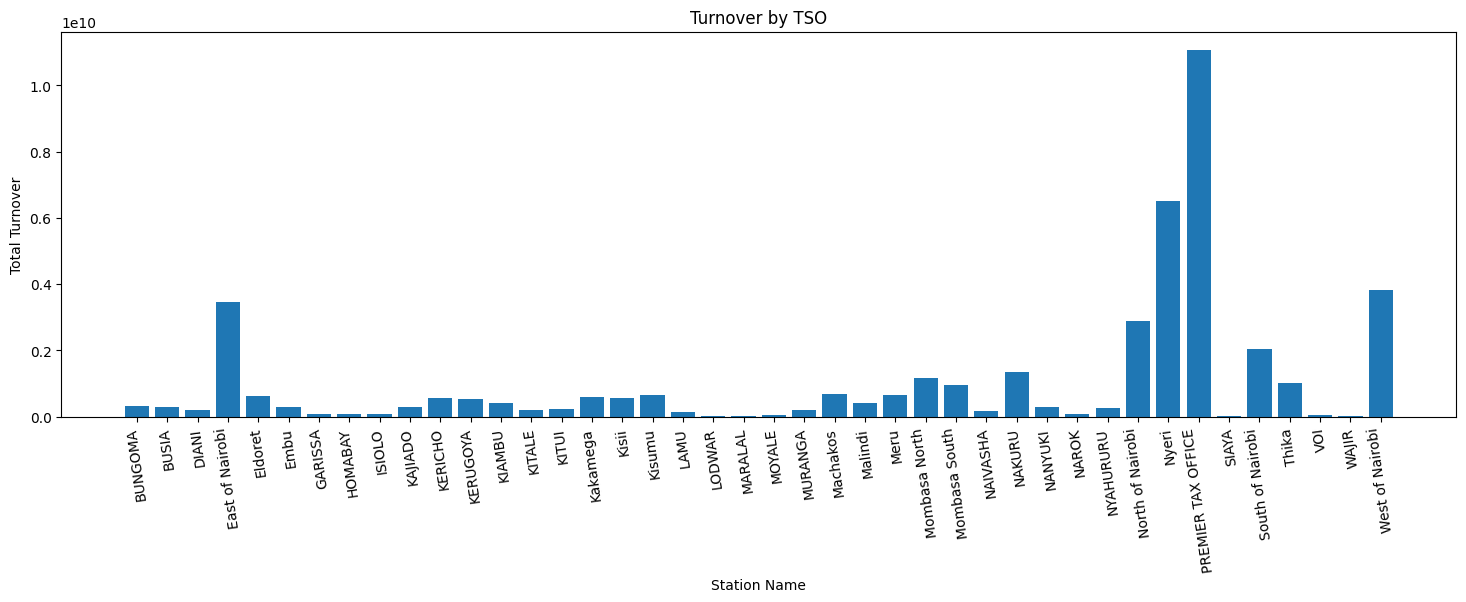

In [67]:
# Grouping by Station Name and calculating the sum of Total Turnover
Turnover = df_income.groupby('station_name')['totalturnover'].sum()

# Creating a bar chart
plt.figure(figsize=(18, 5))
plt.bar(Turnover.index, Turnover.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=98)

plt.xlabel('Station Name')
plt.ylabel('Total Turnover')
plt.title('Turnover by TSO')

# Show the plot
plt.show()

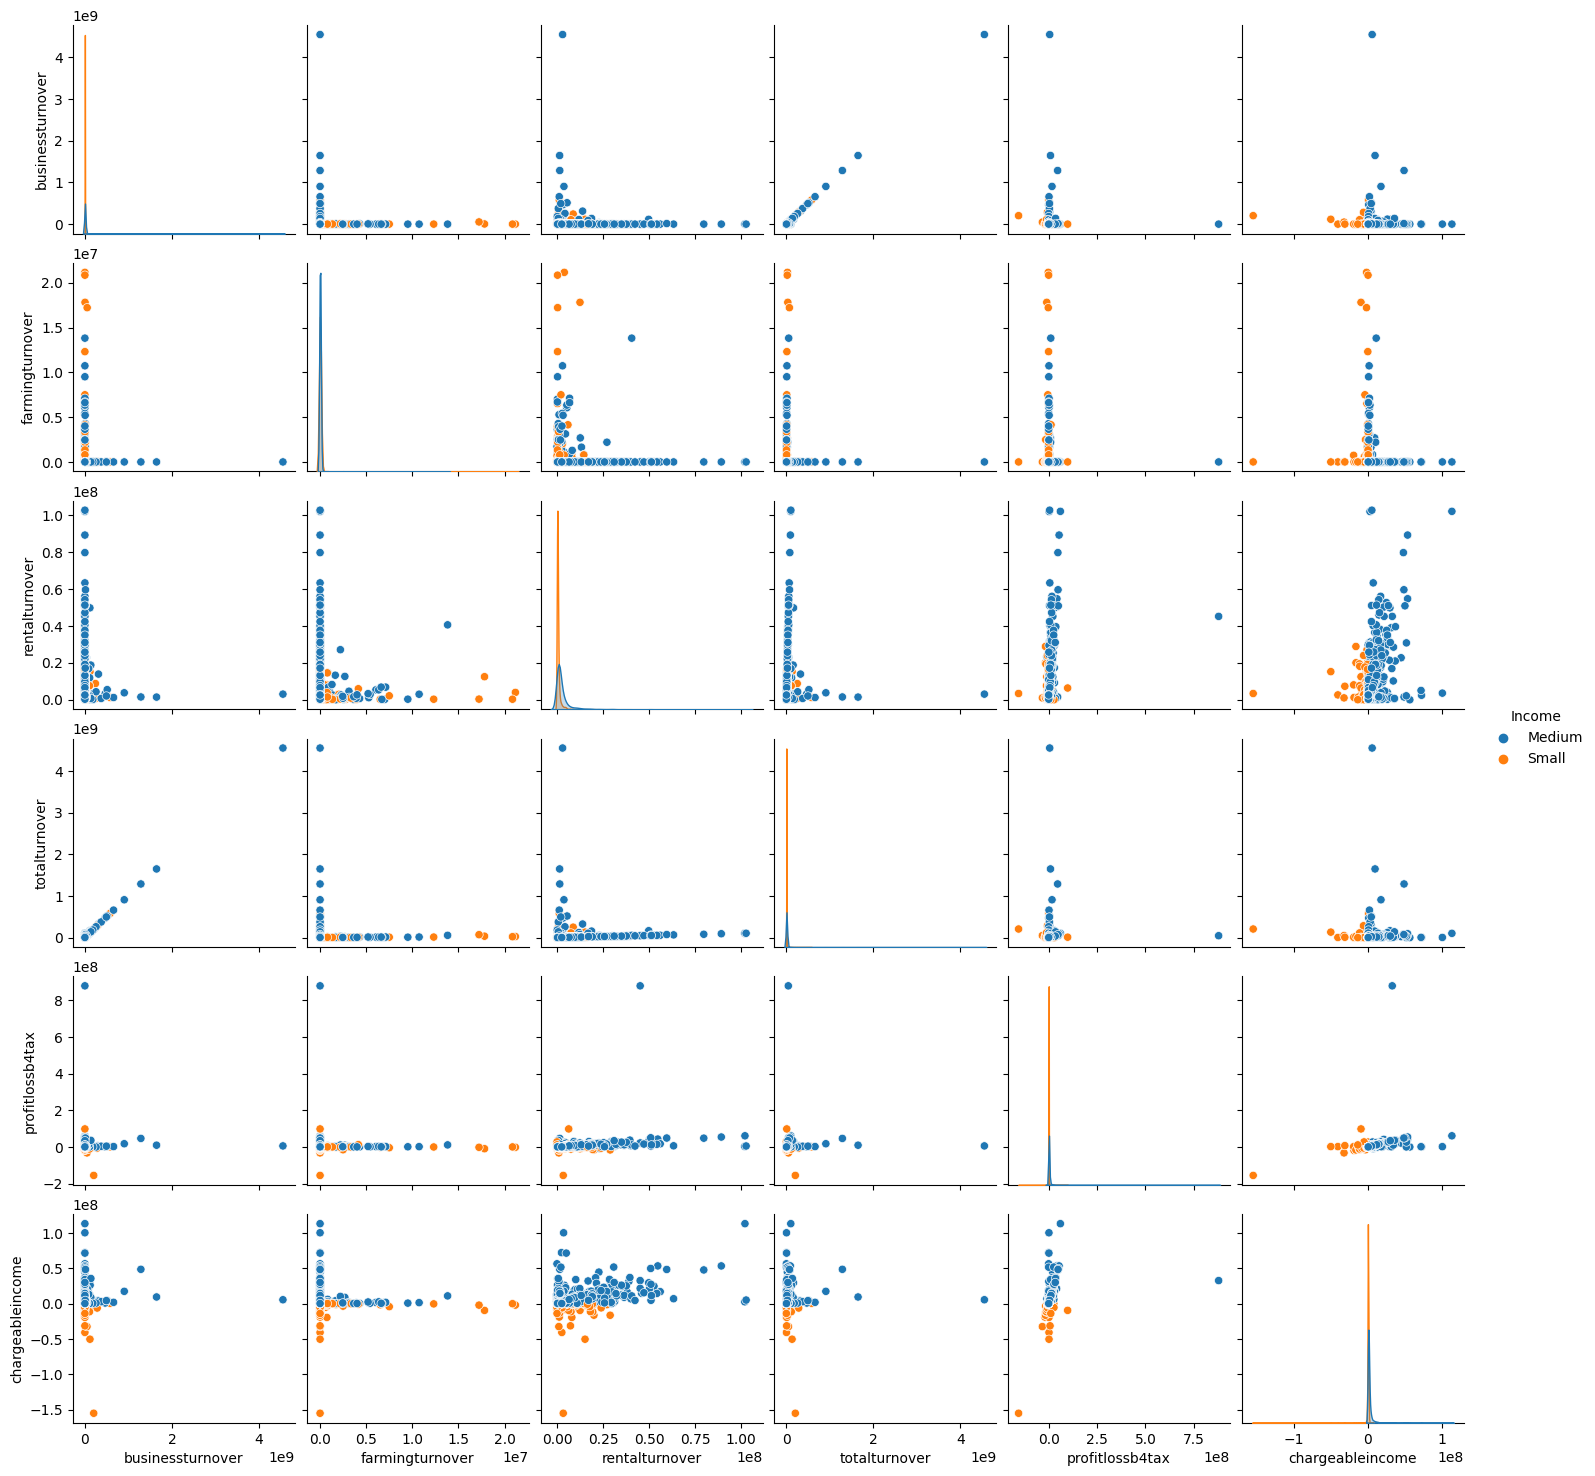

In [68]:
#Pairplot to establish the relationship between select variables and
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_income[[ 'businessturnover', 'farmingturnover', 'rentalturnover',
         'totalturnover', 'profitlossb4tax','chargeableincome', 'Income']], hue='Income')
plt.show()

In [69]:
#Feature Selection
data = df_income[['businessturnover', 'farmingturnover', 'rentalturnover',
         'totalturnover', 'profitlossb4tax','chargeableincome','Income']]
data.head()

,businessturnover,farmingturnover,rentalturnover,totalturnover,profitlossb4tax,chargeableincome,Income
0,0.0,0.0,1095400.0,1095400.0,306360.0,306360.00,Medium
1,578449423.0,0.0,1255058.0,579704481.0,694695.0,694695.00,Small
2,0.0,0.0,189000.0,189000.0,189000.0,189000.00,Small
3,0.0,0.0,240000.0,240000.0,175000.0,175000.00,Small
4,0.0,0.0,765513.0,765513.0,295137.0,295137.18,Small


**Splitting the Dataset into Train and Test**

In [70]:
# Splitting the dataset into 80% as training and 20% as testing.
X = data.drop(['Income'], axis=1)
y = data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


**Scaling and Encoding of categorical variable**

Standard Scaaling to ensure all features have a simillar scale and prevent features with large values from dominating the learning process

In [71]:
# Scaling the dataset to ensure that each feature has the same scale
# defining column transformer to encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# defining the columns that are categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# defining the column transformer with both the scaler and the encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_cols]),
        ('cat', categorical_transformer, categorical_cols)
    ])

# fit and transform the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

**Machine Learning Models**
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Gaussian Naive Bayes
5. KNN
6. Multi-layer Perceptron Classifier

In [72]:
#Train various machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

models = [("Logistic Regression", LogisticRegression(random_state=5, max_iter=100, solver='saga')),
("Decision Tree", DecisionTreeClassifier(random_state=5)),
("Random Forest", RandomForestClassifier(random_state=4)),
("Feed Forward Neural Network", MLPClassifier(random_state=5, max_iter=100)),
("k-Nearest Neighbors", KNeighborsClassifier()),
("Naive Bayes", GaussianNB())]

for name, model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train, y_train)

In [73]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
results = {}
for name, model in models:
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='Medium'),
        'Recall': recall_score(y_test, y_pred, pos_label='Small'),
        'F1-score': f1_score(y_test, y_pred, pos_label='Medium')
    }
results_df = pd.DataFrame(results).T
print(results_df)

                             Accuracy  Precision    Recall  F1-score
Logistic Regression          0.785637   0.898527  0.935214  0.735925
Decision Tree                0.993471   0.990960  0.991641  0.993205
Random Forest                0.995647   0.991001  0.991641  0.995480
Feed Forward Neural Network  0.970076   0.957871  0.960293  0.969153
k-Nearest Neighbors          0.966268   0.945593  0.947753  0.965556
Naive Bayes                  0.569641   0.857143  0.981191  0.214499


**Results Discussion**

**Accuracy**- Overal correctness. Random Forest had the  highest percentage of correct predictions at 99.67%

**Precision** - True Positives. Decision Tree and Randon Forest had the highest percentage of correctily predicted positve observations. Precision measures the accuracy of the positive predictions

**Recall** -  True Positive rate. Decision Tree and Randon Forest had the highest percentage of correctily predicted positve observations relative to the actual positive observations. Recall measures the ability of the model to capture all the positive instances

**F1 score** - harmonic mean provides a balance between Recall and Precision

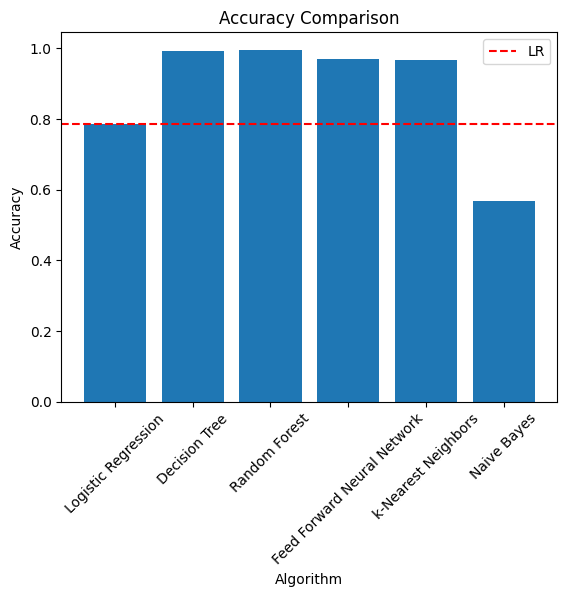

In [74]:
#visualisations comparation of the performance of different algorithms
# Bar Plot
import matplotlib.pyplot as plt

plt.bar(results_df.index, results_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.axhline(y=results_df.loc['Logistic Regression', 'Accuracy'], color='r', linestyle='--', label='LR')
plt.legend()
plt.show()

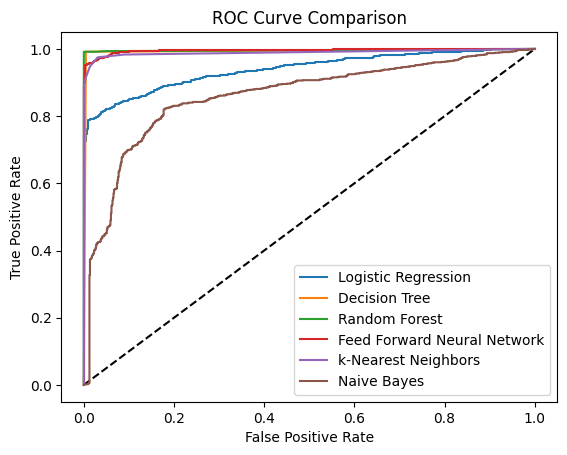

In [75]:
#ROC curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# convert categorical labels to binary labels
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

plt.plot([0, 1], [0, 1], 'k--')
for name, model in models:
    fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

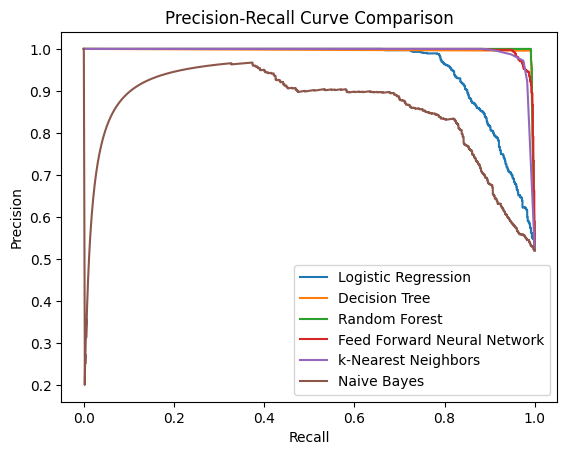

In [76]:
#Precision-Recall Curve
for name, model in models:
  precision, recall, thresholds = precision_recall_curve(y_test_binary, model.predict_proba(X_test)[:,1])
  plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [77]:
#Performing cross-validation - An indication of how the models generalizes to new unseen data
from sklearn.model_selection import cross_val_score
import numpy as np
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print("Model: ", name)
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Model:  Logistic Regression
Mean cross-validation score: 0.7692172236742107
Model:  Decision Tree
Mean cross-validation score: 0.9949648742330719
Model:  Random Forest
Mean cross-validation score: 0.997686518749189
Model:  Feed Forward Neural Network
Mean cross-validation score: 0.9738734730949601
Model:  k-Nearest Neighbors
Mean cross-validation score: 0.967887078537137
Model:  Naive Bayes
Mean cross-validation score: 0.564429553837884


**Optimization**

In [78]:
#Using hyperparameter tuning to optimize the performance of the Logistic regression Model
from sklearn.model_selection import GridSearchCV

lr_params = {"C": np.logspace(-3, 3, 7)}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, solver='saga'), lr_params, cv=10)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

print(f"Best model: {best_lr_model}")

Best model: LogisticRegression(C=100.0, max_iter=1000, random_state=42, solver='saga')


In [79]:
#Evaluating the performance of the best-performing model
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Small')
recall = recall_score(y_test, y_pred, pos_label='Small')
f1 = f1_score(y_test, y_pred, pos_label='Small')
print(f"Best model performance: {best_lr_model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("")

Best model performance: LogisticRegression(C=100.0, max_iter=1000, random_state=42, solver='saga')
Accuracy: 0.8868335146898803
Precision: 0.8420091324200913
Recall: 0.9634273772204807
F1 Score: 0.8986354775828461



In [90]:
# Set the threshold for identifying suspicious tax returns
#Tax returns with = 0.35 will be flagged as suspicious
threshold = 0.35
print(f"Threshold for identifying suspicious tax returns: {threshold:.2f}")

# Identify suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= threshold).astype(int) #creates a binary classification based on the threshold
fraudulent_cases = X_test[y_pred==1, :10] # select only the columns used for prediction
fraudulent_cases_df = pd.DataFrame(fraudulent_cases, columns=X.columns[:10])
print(f"Number of suspicious tax returns identified: {len(fraudulent_cases)}")

Threshold for identifying suspicious tax returns: 0.35
Number of suspicious tax returns identified: 1257


**Back-checking**

A sample of 10 cases identified as fraudulent revealed:
8 cases had under declared sales while 2 had compliance issues. The model therefore works accurately as desired